<a href="https://colab.research.google.com/github/prinsha13/6CS012_Worksheet/blob/main/6CS012_Worksheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#train image data
train_df = "/content/drive/MyDrive/AI and DL/Week-05/dataset/train"

#test image data
test_df = "/content/drive/MyDrive/AI and DL/Week-05/dataset/test"

In [3]:
#Necessary Imports
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [6]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("Corrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("No corrupted images found.")


No corrupted images found.


In [7]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [8]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

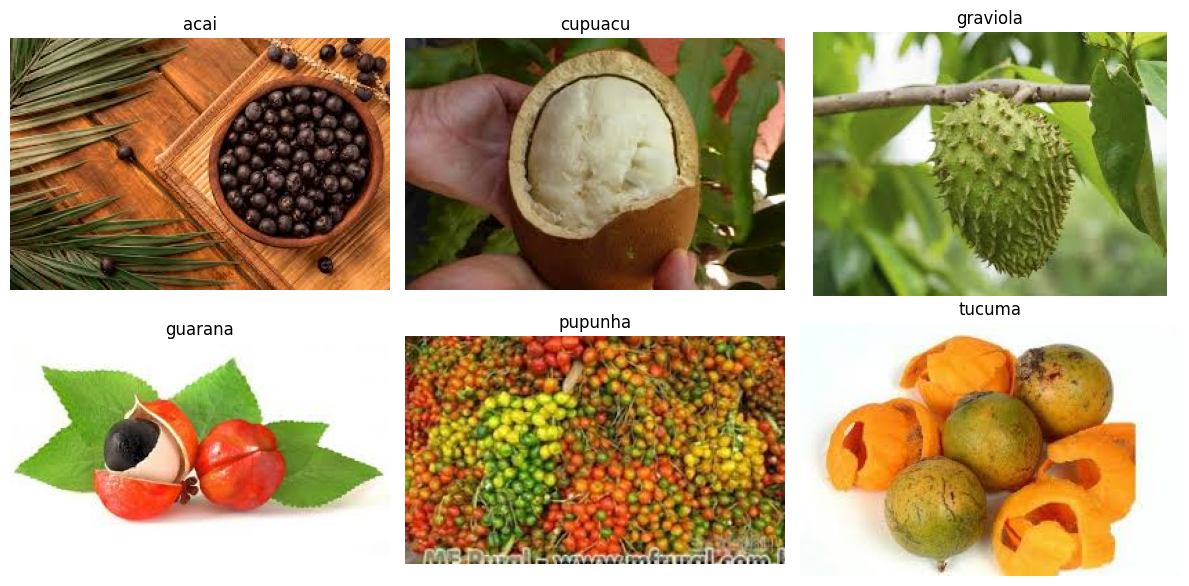

In [9]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [10]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [11]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.1453 - loss: 89.9069

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 650ms/step - accuracy: 0.1437 - loss: 98.5774 - val_accuracy: 0.0556 - val_loss: 66.7960
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.2188 - loss: 62.3100

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.2266 - loss: 60.9856 - val_accuracy: 0.2222 - val_loss: 21.3829
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.2697 - loss: 23.7385

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.2717 - loss: 23.6856 - val_accuracy: 0.2778 - val_loss: 4.7010
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.4537 - loss: 5.6495

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 857ms/step - accuracy: 0.4618 - loss: 5.3700 - val_accuracy: 0.1667 - val_loss: 2.1193
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.5382 - loss: 1.1188 - val_accuracy: 0.2222 - val_loss: 2.2568
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step - accuracy: 0.5977 - loss: 1.0060 - val_accuracy: 0.2222 - val_loss: 2.1709
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.7717 - loss: 0.7430 - val_accuracy: 0.2222 - val_loss: 2.2432
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8947 - loss: 0.5984

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 622ms/step - accuracy: 0.8967 - loss: 0.5906 - val_accuracy: 0.2222 - val_loss: 2.0812
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 0.9518 - loss: 0.3527 - val_accuracy: 0.3889 - val_loss: 2.4211
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - accuracy: 0.9015 - loss: 0.2823 - val_accuracy: 0.2222 - val_loss: 3.5694
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 727ms/step - accuracy: 0.9596 - loss: 0.1387 - val_accuracy: 0.2778 - val_loss: 4.3945
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.9596 - loss: 0.1506 - val_accuracy: 0.2778 - val_loss: 4.0593
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 0.2778 - val_loss: 3.8151
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 438ms/step - accuracy: 1.0000 - loss: 0.0294 - val_accuracy: 0.2778 - val_loss: 3.6255
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 0.3333 - val_los

In [14]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.2222 - loss: 2.0812
Test Accuracy: 0.2222
Test Loss: 2.0812


In [15]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [16]:
from sklearn.metrics import classification_report

In [17]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
              precision    recall  f1-score   support

        acai       0.67      0.67      0.67         3
     cupuacu       0.00      0.00      0.00         4
    graviola       0.25      1.00      0.40         1
     guarana       0.00      0.00      0.00         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.33      0.33      0.33         3

    accuracy                           0.22        18
   macro avg       0.21      0.33      0.23        18
weighted avg       0.18      0.22      0.19        18



In [18]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [19]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [20]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1997 - loss: 2.2992

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.2018 - loss: 2.3073 - val_accuracy: 0.0556 - val_loss: 1.8012
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2188 - loss: 2.0918

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2266 - loss: 2.0918 - val_accuracy: 0.1667 - val_loss: 1.7843
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.4349 - loss: 1.4103 - val_accuracy: 0.1111 - val_loss: 1.7983
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3624 - loss: 1.6474 - val_accuracy: 0.1111 - val_loss: 1.8256
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4353 - loss: 1.6544 - val_accuracy: 0.0556 - val_loss: 1.8981
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5794 - loss: 1.1609 - val_accuracy: 0.0556 - val_loss: 1.9655
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4774 - loss: 1.2766 - val_accuracy: 0.1111 - val_loss: 1.9853
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.5955 - loss: 1.0533 - val_accuracy: 0.2222 - val_loss: 1.9889
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5473 - loss: 1.0279 - val_accuracy: 0.2222 - val_loss: 2.0233
Epoch 10/50
3/3 ━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

**Expected Deliverables:**

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [24]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [25]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1094 - loss: 15.8426

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.1133 - loss: 15.6740 - val_accuracy: 0.1111 - val_loss: 5.6886
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1499 - loss: 12.5764

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.1506 - loss: 12.5352 - val_accuracy: 0.1111 - val_loss: 5.0194
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1499 - loss: 10.6091

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.1506 - loss: 10.4616 - val_accuracy: 0.1111 - val_loss: 4.5777
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2054 - loss: 10.5651

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2027 - loss: 10.6834 - val_accuracy: 0.3333 - val_loss: 4.0211
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2841 - loss: 8.0365

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.2895 - loss: 7.9519 - val_accuracy: 0.4444 - val_loss: 3.6426
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2465 - loss: 7.1029

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.2370 - loss: 7.1119 - val_accuracy: 0.4444 - val_loss: 3.5821
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3446 - loss: 9.0226 - val_accuracy: 0.3889 - val_loss: 3.5893
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3672 - loss: 7.1805 - val_accuracy: 0.4444 - val_loss: 3.5941
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3750 - loss: 7.2349

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3750 - loss: 7.2594 - val_accuracy: 0.4444 - val_loss: 3.5492
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3438 - loss: 6.6596

3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.3516 - loss: 6.5315 - val_accuracy: 0.4444 - val_loss: 3.4141
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3883 - loss: 6.5451

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3989 - loss: 6.4243 - val_accuracy: 0.5000 - val_loss: 3.1036
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4213 - loss: 5.2584

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.4132 - loss: 5.3612 - val_accuracy: 0.5556 - val_loss: 2.8333
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3397 - loss: 5.3167

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3416 - loss: 5.3400 - val_accuracy: 0.5556 - val_loss: 2.5661
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3744 - loss: 5.0516

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.3780 - loss: 5.0887 - val_accuracy: 0.6667 - val_loss: 2.4199
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4948 - loss: 5.4983

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.4961 - loss: 5.4004 - val_accuracy: 0.6667 - val_loss: 2.3877
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4431 - loss: 4.1670 - val_accuracy: 0.6667 - val_loss: 2.4282
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.5786 - loss: 3.0827 - val_accuracy: 0.6667 - val_loss: 2.5045
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.4418 - loss: 5.0532 - val_accuracy: 0.6667 - val_loss: 2.5226
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.6819 - loss: 2.6528 - val_accuracy: 0.6667 - val_loss: 2.4834
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.5551 - loss: 3.1348 - val_accuracy: 0.6667 - val_loss: 2.5098
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 2.3877
Transfer Learning Model Accuracy: 0.6667
Transfer Learning Model Loss: 2.3877

Classification Report:
              precision    recall  f1-score   support

        acai       1.00      0.67  

In [26]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1186 - loss: 2.1016 

3/3 ━━━━━━━━━━━━━━━━━━━━ 61s 18s/step - accuracy: 0.1272 - loss: 2.0869 - val_accuracy: 0.2778 - val_loss: 1.7921
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1557 - loss: 1.9463 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.1515 - loss: 1.9491 - val_accuracy: 0.2222 - val_loss: 1.7858
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.0747 - loss: 2.0078 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.0768 - loss: 2.0032 - val_accuracy: 0.2222 - val_loss: 1.7813
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2060 - loss: 1.8672 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 18s/step - accuracy: 0.1997 - loss: 1.8771 - val_accuracy: 0.1667 - val_loss: 1.7773
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1782 - loss: 1.9142 

3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 17s/step - accuracy: 0.1892 - loss: 1.9084 - val_accuracy: 0.0556 - val_loss: 1.7726
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1551 - loss: 1.8491 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 22s/step - accuracy: 0.1545 - loss: 1.8547 - val_accuracy: 0.1667 - val_loss: 1.7718
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2095 - loss: 1.8057 

3/3 ━━━━━━━━━━━━━━━━━━━━ 67s 23s/step - accuracy: 0.2127 - loss: 1.8044 - val_accuracy: 0.1111 - val_loss: 1.7713
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1829 - loss: 1.8326 

3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 22s/step - accuracy: 0.1962 - loss: 1.8268 - val_accuracy: 0.1111 - val_loss: 1.7687
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2639 - loss: 1.8342 

3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 22s/step - accuracy: 0.2708 - loss: 1.8247 - val_accuracy: 0.1111 - val_loss: 1.7659
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2147 - loss: 1.7920 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.2166 - loss: 1.7872 - val_accuracy: 0.2222 - val_loss: 1.7646
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2338 - loss: 1.8191 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.2413 - loss: 1.8141 - val_accuracy: 0.2222 - val_loss: 1.7610
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2703 - loss: 1.7702 

3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 17s/step - accuracy: 0.2687 - loss: 1.7706 - val_accuracy: 0.2222 - val_loss: 1.7556
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1545 - loss: 1.8050 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.1576 - loss: 1.8056 - val_accuracy: 0.2778 - val_loss: 1.7486
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2737 - loss: 1.7712 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.2817 - loss: 1.7666 - val_accuracy: 0.2778 - val_loss: 1.7423
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2500 - loss: 1.8008 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.2500 - loss: 1.7897 - val_accuracy: 0.2778 - val_loss: 1.7351
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3345 - loss: 1.7122 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.3377 - loss: 1.7083 - val_accuracy: 0.3333 - val_loss: 1.7277
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2650 - loss: 1.7205 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.2648 - loss: 1.7241 - val_accuracy: 0.2778 - val_loss: 1.7204
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3090 - loss: 1.6768 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.3151 - loss: 1.6687 - val_accuracy: 0.3333 - val_loss: 1.7136
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3553 - loss: 1.6550 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.3533 - loss: 1.6535 - val_accuracy: 0.3333 - val_loss: 1.7086
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2361 - loss: 1.7224 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - accuracy: 0.2292 - loss: 1.7237 - val_accuracy: 0.3889 - val_loss: 1.7058
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2801 - loss: 1.7096 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 19s/step - accuracy: 0.2795 - loss: 1.7107 - val_accuracy: 0.3889 - val_loss: 1.7055
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2830 - loss: 1.6322 

3/3 ━━━━━━━━━━━━━━━━━━━━ 90s 22s/step - accuracy: 0.2956 - loss: 1.6225 - val_accuracy: 0.3889 - val_loss: 1.7032
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3507 - loss: 1.6282 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 23s/step - accuracy: 0.3464 - loss: 1.6295 - val_accuracy: 0.3333 - val_loss: 1.7020
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3600 - loss: 1.6281 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.3602 - loss: 1.6293 - val_accuracy: 0.3333 - val_loss: 1.6981
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2859 - loss: 1.6942 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.2804 - loss: 1.6976 - val_accuracy: 0.3889 - val_loss: 1.6926
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4109 - loss: 1.4905 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 22s/step - accuracy: 0.4054 - loss: 1.4969 - val_accuracy: 0.3889 - val_loss: 1.6893
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2888 - loss: 1.6214 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 23s/step - accuracy: 0.2964 - loss: 1.6176 - val_accuracy: 0.3889 - val_loss: 1.6877
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3692 - loss: 1.5967 

3/3 ━━━━━━━━━━━━━━━━━━━━ 80s 23s/step - accuracy: 0.3741 - loss: 1.5908 - val_accuracy: 0.3889 - val_loss: 1.6856
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3970 - loss: 1.5545 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.3845 - loss: 1.5610 - val_accuracy: 0.3889 - val_loss: 1.6840
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4091 - loss: 1.5942 

3/3 ━━━━━━━━━━━━━━━━━━━━ 84s 18s/step - accuracy: 0.4145 - loss: 1.5886 - val_accuracy: 0.3889 - val_loss: 1.6829
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3889 - loss: 1.6829

Transfer Learning Model Accuracy: 0.3889
Transfer Learning Model Loss: 1.6829

Classification Report:
              precision    recall  f1-score   support

        acai       0.25      0.33      0.29         3
     cupuacu       1.00      0.50      0.67         4
    graviola       0.20      1.00      0.33         1
     guarana       0.40      0.67      0.50         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.50      0.33      0.40         3

    accuracy                           0.39        18
   macro avg       0.39      0.47      0.36        18
weighted avg       0.43      0.39      0.36        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
